In [282]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Artist cleaning

In [283]:
artist_df = pd.read_feather('raw_data/artist.feather')
artist_df

,artist_id,artist_name,external url,genre,image_url,followers,popularity,type,artist_uri
0,5JdT0LYJdlPbTC58p60WTX,Hilary Hahn,https://open.spotify.com/artist/5JdT0LYJdlPbTC...,classical performance,https://i.scdn.co/image/ab6761610000e5eb35f3c2...,131906,49,artist,spotify:artist:5JdT0LYJdlPbTC58p60WTX
1,55tif8708yyDQlSjh3Trdu,Ben Folds,https://open.spotify.com/artist/55tif8708yyDQl...,permanent wave,https://i.scdn.co/image/ab6761610000e5ebb79aa7...,273522,50,artist,spotify:artist:55tif8708yyDQlSjh3Trdu
2,2NzWRNaaLByHyI3wpuec8P,Jim Brickman,https://open.spotify.com/artist/2NzWRNaaLByHyI...,new age,https://i.scdn.co/image/ab6761610000e5eb6ccb24...,103876,55,artist,spotify:artist:2NzWRNaaLByHyI3wpuec8P
3,4QQgXkCYTt3BlENzhyNETg,"Earth, Wind & Fire",https://open.spotify.com/artist/4QQgXkCYTt3BlE...,disco,https://i.scdn.co/image/ab6761610000e5eb9722e1...,3605633,73,artist,spotify:artist:4QQgXkCYTt3BlENzhyNETg
4,3iDD7bnsjL9J4fO298r0L0,Chicago,https://open.spotify.com/artist/3iDD7bnsjL9J4f...,adult standards,https://i.scdn.co/image/ab6761610000e5eb552671...,3219886,68,artist,spotify:artist:3iDD7bnsjL9J4fO298r0L0
5,1dyGPAYZZHHW6WIqwKN5QF,Chris Thile,https://open.spotify.com/artist/1dyGPAYZZHHW6W...,bluegrass,https://i.scdn.co/image/ab6761610000e5eb0075ea...,102738,47,artist,spotify:artist:1dyGPAYZZHHW6WIqwKN5QF
6,2ka8z2lwkcp13fG8Wyv3xU,Béla Fleck,https://open.spotify.com/artist/2ka8z2lwkcp13f...,banjo,https://i.scdn.co/image/ab6761610000e5eb9e9fbc...,64710,43,artist,spotify:artist:2ka8z2lwkcp13fG8Wyv3xU
7,6mGZXaZ4SWNh6IsJ57thCp,Fernando Ortega,https://open.spotify.com/artist/6mGZXaZ4SWNh6I...,christian music,https://i.scdn.co/image/ab6761610000e5ebcdb890...,67141,46,artist,spotify:artist:6mGZXaZ4SWNh6IsJ57thCp
8,7IqwNdpG9USkkEH36pkKEB,Elliott Carter,https://open.spotify.com/artist/7IqwNdpG9USkkE...,american modern classical,https://i.scdn.co/image/fa9b059dfd9333ad7abe03...,5318,13,artist,spotify:artist:7IqwNdpG9USkkEH36pkKEB
9,0QWrMNukfcVOmgEU0FEDyD,Jacob Collier,https://open.spotify.com/artist/0QWrMNukfcVOmg...,uk alternative pop,https://i.scdn.co/image/ab6761610000e5ebdc6f22...,561976,59,artist,spotify:artist:0QWrMNukfcVOmgEU0FEDyD


Since I know the genres, I'll impute them manually

In [284]:
none_indexes = artist_df.index[artist_df['genre'].isna()].tolist()

In [285]:
for i in none_indexes:
    if artist_df.loc[i, 'artist_name'] in performers:
        artist_df.loc[i, 'genre'] = 'classical performance'
    elif artist_df.loc[i, 'artist_name'] in composers:
        artist_df.loc[i, 'genre'] = '21st century classical'
    elif artist_df.loc[i, 'artist_name'] == 'Deborah Klemme':
        artist_df.loc[i, 'genre'] = 'christian music'
    elif artist_df.loc[i, 'artist_name'] == '7 Days A Cappella':
        artist_df.loc[i, 'genre'] = 'college a cappella'
    
artist_df    

,artist_id,artist_name,external url,genre,image_url,followers,popularity,type,artist_uri
0,5JdT0LYJdlPbTC58p60WTX,Hilary Hahn,https://open.spotify.com/artist/5JdT0LYJdlPbTC...,classical performance,https://i.scdn.co/image/ab6761610000e5eb35f3c2...,131906,49,artist,spotify:artist:5JdT0LYJdlPbTC58p60WTX
1,55tif8708yyDQlSjh3Trdu,Ben Folds,https://open.spotify.com/artist/55tif8708yyDQl...,permanent wave,https://i.scdn.co/image/ab6761610000e5ebb79aa7...,273522,50,artist,spotify:artist:55tif8708yyDQlSjh3Trdu
2,2NzWRNaaLByHyI3wpuec8P,Jim Brickman,https://open.spotify.com/artist/2NzWRNaaLByHyI...,new age,https://i.scdn.co/image/ab6761610000e5eb6ccb24...,103876,55,artist,spotify:artist:2NzWRNaaLByHyI3wpuec8P
3,4QQgXkCYTt3BlENzhyNETg,"Earth, Wind & Fire",https://open.spotify.com/artist/4QQgXkCYTt3BlE...,disco,https://i.scdn.co/image/ab6761610000e5eb9722e1...,3605633,73,artist,spotify:artist:4QQgXkCYTt3BlENzhyNETg
4,3iDD7bnsjL9J4fO298r0L0,Chicago,https://open.spotify.com/artist/3iDD7bnsjL9J4f...,adult standards,https://i.scdn.co/image/ab6761610000e5eb552671...,3219886,68,artist,spotify:artist:3iDD7bnsjL9J4fO298r0L0
5,1dyGPAYZZHHW6WIqwKN5QF,Chris Thile,https://open.spotify.com/artist/1dyGPAYZZHHW6W...,bluegrass,https://i.scdn.co/image/ab6761610000e5eb0075ea...,102738,47,artist,spotify:artist:1dyGPAYZZHHW6WIqwKN5QF
6,2ka8z2lwkcp13fG8Wyv3xU,Béla Fleck,https://open.spotify.com/artist/2ka8z2lwkcp13f...,banjo,https://i.scdn.co/image/ab6761610000e5eb9e9fbc...,64710,43,artist,spotify:artist:2ka8z2lwkcp13fG8Wyv3xU
7,6mGZXaZ4SWNh6IsJ57thCp,Fernando Ortega,https://open.spotify.com/artist/6mGZXaZ4SWNh6I...,christian music,https://i.scdn.co/image/ab6761610000e5ebcdb890...,67141,46,artist,spotify:artist:6mGZXaZ4SWNh6IsJ57thCp
8,7IqwNdpG9USkkEH36pkKEB,Elliott Carter,https://open.spotify.com/artist/7IqwNdpG9USkkE...,american modern classical,https://i.scdn.co/image/fa9b059dfd9333ad7abe03...,5318,13,artist,spotify:artist:7IqwNdpG9USkkEH36pkKEB
9,0QWrMNukfcVOmgEU0FEDyD,Jacob Collier,https://open.spotify.com/artist/0QWrMNukfcVOmg...,uk alternative pop,https://i.scdn.co/image/ab6761610000e5ebdc6f22...,561976,59,artist,spotify:artist:0QWrMNukfcVOmgEU0FEDyD


## Album cleaning

In [381]:
album_df = pd.read_feather('raw_data/album.feather')
album_df.head(5)

,album_id,album_name,external_url,image_url,release_date,total_tracks,type,album_uri,artist_id
0,2NjZtmTa1FRYlc629X8ueC,Paris,https://open.spotify.com/album/2NjZtmTa1FRYlc6...,https://i.scdn.co/image/ab67616d0000b27365625b...,2021-03-05,6,album,spotify:album:2NjZtmTa1FRYlc629X8ueC,5JdT0LYJdlPbTC58p60WTX
1,0C7mN21DMgaosXkuqVgnvb,García Abril: 6 Partitas,https://open.spotify.com/album/0C7mN21DMgaosXk...,https://i.scdn.co/image/ab67616d0000b2738feb2e...,2019-05-17,6,album,spotify:album:0C7mN21DMgaosXkuqVgnvb,5JdT0LYJdlPbTC58p60WTX
2,2ot197WiXh41pOZaY726OZ,Hilary Hahn plays Bach: Violin Sonatas Nos. 1 ...,https://open.spotify.com/album/2ot197WiXh41pOZ...,https://i.scdn.co/image/ab67616d0000b273deacd2...,2018-10-05,16,album,spotify:album:2ot197WiXh41pOZaY726OZ,5JdT0LYJdlPbTC58p60WTX
3,4PwefaueJI4fG1JLBBjNXX,Retrospective,https://open.spotify.com/album/4PwefaueJI4fG1J...,https://i.scdn.co/image/ab67616d0000b273e8b77f...,2018-01-19,17,album,spotify:album:4PwefaueJI4fG1JLBBjNXX,5JdT0LYJdlPbTC58p60WTX
4,5GDrGfzGDod15dudivfFV5,"Mozart: Violin Concerto No.5 In A, K.219 / Vie...",https://open.spotify.com/album/5GDrGfzGDod15du...,https://i.scdn.co/image/ab67616d0000b2734a4382...,2014-03-13,7,album,spotify:album:5GDrGfzGDod15dudivfFV5,5JdT0LYJdlPbTC58p60WTX


In [383]:
album_df.shape

(570, 9)

In [384]:
compilations_df = album_df[album_df['type'] == 'compilation']
compilation_ids = compilations_df['album_id'].tolist()
album_df.drop(compilations_df.index, inplace=True)
album_df.shape

(463, 9)

In [300]:
outlier_df = album_df[album_df['album_id'].isin(outlier_ids)]
outlier_df['total_tracks'].sum()
outlier_df.shape

(9, 9)

In [287]:
cols = album_df.columns

In [290]:
# useful_cols = ['release_date', 'total_tracks', 'type', 'artist_id']
# for col in useful_cols:
#     print(album_df[album_df['type'] == 'album'][col].value_counts())
#     print('\n\n\n*******')

Given the size of the dataframe, I'm not going to go through to figure out which albums are irrelevant to the task at hand.

A cap of 60 tracks seems to be a reasonable limit; it cuts two albums I'd rather save, but I'll sacrifice them for the sake of time.

I will save those album ids to remove those tracks from the track table.

In [385]:
outlier_df = album_df[album_df['total_tracks'] > 60]
outlier_ids = outlier_df['album_id'].tolist()
print(outlier_ids)
album_df.drop(outlier_df.index, inplace=True)
# album_df[40:50]

['76ED1psWUaUdcn60PBP8vT', '2tsqnCs2T27ZrLrkqEjnXW', '1LaB2SnW9c3QHNz4JqOpKC', '5qEfX4GfTdzfRbZL8ZQky1']


In [303]:
print(len(outlier_ids))

9


## Track cleaning

In [380]:
track_df = pd.read_feather('raw_data/track.feather')
track_df.head(5)

,track_id,song_name,external_url,duration_ms,explicit,disc_number,type,song_uri,album_id
0,6DUqgJGRai5W7vgSxwSmRk,"Poème for Violin and Orchestra, Op. 25",https://open.spotify.com/track/6DUqgJGRai5W7vg...,1023040,False,1,track,spotify:track:6DUqgJGRai5W7vgSxwSmRk,2NjZtmTa1FRYlc629X8ueC
1,2RV5ZQOformmqqslmPN4G9,"Violin Concerto No. 1 in D Major, Op. 19: I. A...",https://open.spotify.com/track/2RV5ZQOformmqqs...,576480,False,1,track,spotify:track:2RV5ZQOformmqqslmPN4G9,2NjZtmTa1FRYlc629X8ueC
2,6BlCXoqaXBilMA62hLBCtT,"Violin Concerto No. 1 in D Major, Op. 19: II. ...",https://open.spotify.com/track/6BlCXoqaXBilMA6...,234720,False,1,track,spotify:track:6BlCXoqaXBilMA62hLBCtT,2NjZtmTa1FRYlc629X8ueC
3,6gnH9b4GiS7fSXaaY94gG8,"Violin Concerto No. 1 in D Major, Op. 19: III....",https://open.spotify.com/track/6gnH9b4GiS7fSXa...,483600,False,1,track,spotify:track:6gnH9b4GiS7fSXaaY94gG8,2NjZtmTa1FRYlc629X8ueC
4,5sjFGklnKyQmEBN9WEMXkm,Deux Sérénades (Written for Hilary Hahn): No. ...,https://open.spotify.com/track/5sjFGklnKyQmEBN...,470400,False,1,track,spotify:track:5sjFGklnKyQmEBN9WEMXkm,2NjZtmTa1FRYlc629X8ueC


In [305]:
for id in outlier_ids:
    print(track_df[track_df['album_id'] == id].shape)

(50, 9)
(50, 9)
(50, 9)
(50, 9)
(50, 9)
(50, 9)
(50, 9)
(50, 9)
(50, 9)


In [295]:
outlier_tracks = track_df[track_df['album_id'].isin(outlier_ids)]
outlier_tracks

,track_id,song_name,external_url,duration_ms,explicit,disc_number,type,song_uri,album_id
391,0uf7AISMfAV9kRwPO7VSs9,"Divertimento No. 11 in D, K.251 ""Nannerl-Septe...",https://open.spotify.com/track/0uf7AISMfAV9kRw...,39733,False,1,track,spotify:track:0uf7AISMfAV9kRwPO7VSs9,2tsqnCs2T27ZrLrkqEjnXW
392,0w5iojLyQicvnfLyW4hJqk,"Les petits riens, K.app.10 (ballet): 11. Agité",https://open.spotify.com/track/0w5iojLyQicvnfL...,42826,False,1,track,spotify:track:0w5iojLyQicvnfLyW4hJqk,2tsqnCs2T27ZrLrkqEjnXW
393,40PLLD53Lc7WFgh9FXwHq3,"7 Variations on ""Willem van Nassau"" in D, K.25...",https://open.spotify.com/track/40PLLD53Lc7WFgh...,41633,False,1,track,spotify:track:40PLLD53Lc7WFgh9FXwHq3,2tsqnCs2T27ZrLrkqEjnXW
394,1UjBIAmYWDF13kKr07uOT1,"8 Variations on ""Laat ons juichen"" by C.E. Gra...",https://open.spotify.com/track/1UjBIAmYWDF13kK...,40651,False,1,track,spotify:track:1UjBIAmYWDF13kKr07uOT1,2tsqnCs2T27ZrLrkqEjnXW
395,40BucsKqinyxOvfAyMv4og,19 Minuets K.103: No. 16 in G,https://open.spotify.com/track/40BucsKqinyxOvf...,42000,False,1,track,spotify:track:40BucsKqinyxOvfAyMv4og,2tsqnCs2T27ZrLrkqEjnXW
...,...,...,...,...,...,...,...,...,...
6265,1PcTz0bBp5F8ZDMw2IqC7f,Loose Ends,https://open.spotify.com/track/1PcTz0bBp5F8ZDM...,256198,True,1,track,spotify:track:1PcTz0bBp5F8ZDMw2IqC7f,3b5niyOjaUN6ScynZrLiFj
6266,0VWbNYg7A94eXhA7HUgonT,Losing Focus,https://open.spotify.com/track/0VWbNYg7A94eXhA...,213492,True,1,track,spotify:track:0VWbNYg7A94eXhA7HUgonT,3b5niyOjaUN6ScynZrLiFj
6267,32oZMhpW1HPdUA3xp365FA,My Oasis,https://open.spotify.com/track/32oZMhpW1HPdUA3...,179916,False,1,track,spotify:track:32oZMhpW1HPdUA3xp365FA,3b5niyOjaUN6ScynZrLiFj
6268,0NiMbTfmn0E0vrcf6ggoil,NORTHSIDE,https://open.spotify.com/track/0NiMbTfmn0E0vrc...,209722,True,1,track,spotify:track:0NiMbTfmn0E0vrcf6ggoil,3b5niyOjaUN6ScynZrLiFj


In [306]:
track_df.shape

(7668, 9)

In [307]:
outlier_track_ids = outlier_tracks['track_id'].tolist()
track_df.drop(outlier_tracks.index, inplace=True)
print(len(outlier_track_ids))
print(outlier_track_ids[:20])
print(track_df.shape)

450
['0uf7AISMfAV9kRwPO7VSs9', '0w5iojLyQicvnfLyW4hJqk', '40PLLD53Lc7WFgh9FXwHq3', '1UjBIAmYWDF13kKr07uOT1', '40BucsKqinyxOvfAyMv4og', '1lHuJrCpxxqU7cl9OgQfnE', '2MDTiechqxn250tCU9rTuF', '1WiluHSSJpvaruKXh9Fw0w', '3TBLGlLun0raw5LZhCDzYI', '1RSNowzsnT5B6iUGiL28Dv', '48KuT5NX49xVqLm3ESoJ5c', '2ygurwn9AuGiKtApgiv05c', '4is4Xm2FP2rblgqqaVXJR0', '5NMMV9mBOX9nzHM8Wi8P4p', '4owEmIYd9INZn2WTjmPoIP', '5kaxWiVnNzhBcXHGpijmOS', '1SaDfUxMiKgQnaGC5rk1Nu', '2gOg63fb6PGY5XMJwoCTxS', '5uaC8vvd8mgSbrvAnx8fzz', '1YhynQwFux54JQ1yGpzgwU']
(7218, 9)


In [308]:
track_df.isna().sum()

track_id        0
song_name       0
external_url    0
duration_ms     0
explicit        0
disc_number     0
type            0
song_uri        0
album_id        0
dtype: int64

## Track_features cleaning

In [367]:
track_feature_df = pd.read_feather('raw_data/track_feature.feather')
track_feature_df.head(5)

,track_id,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,type,valence,song_uri
0,6DUqgJGRai5W7vgSxwSmRk,0.121,0.124,0.560,0.107,-22.930,0.042,91.838,audio_features,0.035,spotify:track:6DUqgJGRai5W7vgSxwSmRk
1,2RV5ZQOformmqqslmPN4G9,0.294,0.144,0.188,0.384,-25.954,0.048,106.247,audio_features,0.081,spotify:track:2RV5ZQOformmqqslmPN4G9
2,6BlCXoqaXBilMA62hLBCtT,0.472,0.270,0.789,0.055,-23.245,0.092,150.013,audio_features,0.467,spotify:track:6BlCXoqaXBilMA62hLBCtT
3,6gnH9b4GiS7fSXaaY94gG8,0.237,0.121,0.256,0.271,-22.860,0.039,103.345,audio_features,0.071,spotify:track:6gnH9b4GiS7fSXaaY94gG8
4,5sjFGklnKyQmEBN9WEMXkm,0.109,0.079,0.732,0.108,-25.191,0.046,91.888,audio_features,0.036,spotify:track:5sjFGklnKyQmEBN9WEMXkm


In [368]:
track_feature_df.isna().sum()

track_id               0
danceability           5
energy                 0
instrumentalness    1133
liveness               0
loudness               0
speechiness            5
tempo                  5
type                   0
valence                9
song_uri               0
dtype: int64

Tracks which have been removed from the track table should also be removed here

In [373]:
print(len(outlier_track_ids))

450


In [376]:
drop_indexes = track_feature_df[track_feature_df['track_id'].isin(outlier_track_ids)].index
print(len(drop_indexes))

448


In [377]:
track_feature_df.drop(drop_indexes, inplace=True)
track_feature_df.shape

(7217, 11)

There are a bunch of nulls in the instrumentalness column. This is likely due to the more obscure nature of some of the classical music in the list.

In order to impute values, I'll need to figure out which ones are from classical instrumental tracks.

In [318]:
print(track_feature_df[track_feature_df['instrumentalness'] > 0.7].shape)
print(track_feature_df[track_feature_df['instrumentalness'] > 0.8].shape)
print(track_feature_df[track_feature_df['instrumentalness'] > 0.9].shape)

print(track_feature_df[track_feature_df['instrumentalness'] < 0.3].shape)
print(track_feature_df[track_feature_df['instrumentalness'] < 0.2].shape)
print(track_feature_df[track_feature_df['instrumentalness'] < 0.1].shape)

(2417, 11)
(2099, 11)
(994, 11)
(3370, 11)
(3207, 11)
(2993, 11)


In [316]:
import random

In [317]:
track_feature_df[track_feature_df['instrumentalness'].isna()]

,track_id,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,type,valence,song_uri
55,5Blt6wggkJxm0qQ6kzeLNt,0.657,0.102,NaN,0.263,-30.666,0.074,101.978,audio_features,0.965,spotify:track:5Blt6wggkJxm0qQ6kzeLNt
113,0FQ0WBSWNR85pF64OKkkjG,0.294,0.150,NaN,0.133,-17.395,0.068,88.162,audio_features,0.616,spotify:track:0FQ0WBSWNR85pF64OKkkjG
117,2CI3ceQeTFSrwbxQsjX5nx,0.381,0.150,NaN,0.111,-16.949,0.046,84.874,audio_features,0.521,spotify:track:2CI3ceQeTFSrwbxQsjX5nx
133,2Y4fhaPNxD1HXG18F82i33,0.660,0.058,NaN,0.388,-28.404,0.877,95.248,audio_features,0.353,spotify:track:2Y4fhaPNxD1HXG18F82i33
134,5ZZf8KujXg1a4HIoqyfYXM,0.617,0.067,NaN,0.309,-28.101,0.832,95.286,audio_features,0.444,spotify:track:5ZZf8KujXg1a4HIoqyfYXM
...,...,...,...,...,...,...,...,...,...,...,...
7658,75rsBd9lhjc0fjbxtptZjg,0.720,0.609,NaN,0.098,-6.022,0.071,96.015,audio_features,0.721,spotify:track:75rsBd9lhjc0fjbxtptZjg
7659,1vM3LwLZIAWbE7m6FgJwk7,0.172,0.417,NaN,0.147,-9.377,0.043,179.885,audio_features,0.183,spotify:track:1vM3LwLZIAWbE7m6FgJwk7
7660,0CWJsruvawsICLAEIOSQvJ,0.453,0.582,NaN,0.141,-5.177,0.029,127.288,audio_features,0.302,spotify:track:0CWJsruvawsICLAEIOSQvJ
7661,2awOs44I8K8HgOVCQBLGgY,0.621,0.926,NaN,0.665,-5.634,0.044,104.988,audio_features,0.843,spotify:track:2awOs44I8K8HgOVCQBLGgY


In [319]:
clean_artist = pd.read_feather('cleaned_data/cleaned_artist.feather')
clean_artist

,artist_id,artist_name,external url,genre,image_url,followers,popularity,type,artist_uri
0,5JdT0LYJdlPbTC58p60WTX,Hilary Hahn,https://open.spotify.com/artist/5JdT0LYJdlPbTC...,classical performance,https://i.scdn.co/image/ab6761610000e5eb35f3c2...,131906,49,artist,spotify:artist:5JdT0LYJdlPbTC58p60WTX
1,55tif8708yyDQlSjh3Trdu,Ben Folds,https://open.spotify.com/artist/55tif8708yyDQl...,permanent wave,https://i.scdn.co/image/ab6761610000e5ebb79aa7...,273522,50,artist,spotify:artist:55tif8708yyDQlSjh3Trdu
2,2NzWRNaaLByHyI3wpuec8P,Jim Brickman,https://open.spotify.com/artist/2NzWRNaaLByHyI...,new age,https://i.scdn.co/image/ab6761610000e5eb6ccb24...,103876,55,artist,spotify:artist:2NzWRNaaLByHyI3wpuec8P
3,4QQgXkCYTt3BlENzhyNETg,"Earth, Wind & Fire",https://open.spotify.com/artist/4QQgXkCYTt3BlE...,disco,https://i.scdn.co/image/ab6761610000e5eb9722e1...,3605633,73,artist,spotify:artist:4QQgXkCYTt3BlENzhyNETg
4,3iDD7bnsjL9J4fO298r0L0,Chicago,https://open.spotify.com/artist/3iDD7bnsjL9J4f...,adult standards,https://i.scdn.co/image/ab6761610000e5eb552671...,3219886,68,artist,spotify:artist:3iDD7bnsjL9J4fO298r0L0
5,1dyGPAYZZHHW6WIqwKN5QF,Chris Thile,https://open.spotify.com/artist/1dyGPAYZZHHW6W...,bluegrass,https://i.scdn.co/image/ab6761610000e5eb0075ea...,102738,47,artist,spotify:artist:1dyGPAYZZHHW6WIqwKN5QF
6,2ka8z2lwkcp13fG8Wyv3xU,Béla Fleck,https://open.spotify.com/artist/2ka8z2lwkcp13f...,banjo,https://i.scdn.co/image/ab6761610000e5eb9e9fbc...,64710,43,artist,spotify:artist:2ka8z2lwkcp13fG8Wyv3xU
7,6mGZXaZ4SWNh6IsJ57thCp,Fernando Ortega,https://open.spotify.com/artist/6mGZXaZ4SWNh6I...,christian music,https://i.scdn.co/image/ab6761610000e5ebcdb890...,67141,46,artist,spotify:artist:6mGZXaZ4SWNh6IsJ57thCp
8,7IqwNdpG9USkkEH36pkKEB,Elliott Carter,https://open.spotify.com/artist/7IqwNdpG9USkkE...,american modern classical,https://i.scdn.co/image/fa9b059dfd9333ad7abe03...,5318,13,artist,spotify:artist:7IqwNdpG9USkkEH36pkKEB
9,0QWrMNukfcVOmgEU0FEDyD,Jacob Collier,https://open.spotify.com/artist/0QWrMNukfcVOmg...,uk alternative pop,https://i.scdn.co/image/ab6761610000e5ebdc6f22...,561976,59,artist,spotify:artist:0QWrMNukfcVOmgEU0FEDyD


In [321]:
print(clean_artist['artist_name'].tolist())

['Hilary Hahn', 'Ben Folds', 'Jim Brickman', 'Earth, Wind & Fire', 'Chicago', 'Chris Thile', 'Béla Fleck', 'Fernando Ortega', 'Elliott Carter', 'Jacob Collier', 'Deborah Klemme', 'Michael-Thomas Foumai', 'Augusta Read Thomas', 'Elliott Miles McKinley', 'Jacob Tews', 'Christopher Walczak', 'Korey Konkol', 'Clare Longendyke', 'Erik Rohde', '7 Days A Cappella']


In [322]:
instrumentals = ['Hilary Hahn', 'Jim Brickman', 'Chris Thile', 'Béla Fleck', 'Elliott Carter', 'Michael-Thomas Foumai', 'Augusta Read Thomas', 'Elliott Miles McKinley', 'Jacob Tews', 'Christopher Walczak', 'Korey Konkol', 'Clare Longendyke', 'Erik Rohde']
vocals = ['Ben Folds', 'Earth, Wind & Fire', 'Chicago', 'Fernando Ortega', 'Jacob Collier', 'Deborah Klemme', '7 Days A Cappella']

In [332]:
instrumental_ids = [clean_artist.loc[clean_artist['artist_name'] == artist_name, 'artist_id'].item() for artist_name in instrumentals]
vocal_ids = [clean_artist.loc[clean_artist['artist_name'] == artist_name, 'artist_id'].item() for artist_name in vocals]

In [334]:
clean_album = pd.read_feather('cleaned_data/cleaned_album.feather')

In [342]:
instrumental_album_ids = []
for album_list in [clean_album.loc[clean_album['artist_id'] == artist_id, 'album_id'].tolist() for artist_id in instrumental_ids]:
    for id in album_list:
        instrumental_album_ids.append(id)
print(len(instrumental_album_ids))

312


In [343]:
vocal_album_ids = []
for album_list in [clean_album.loc[clean_album['artist_id'] == artist_id, 'album_id'].tolist() for artist_id in vocal_ids]:
    for id in album_list:
        vocal_album_ids.append(id)
print(len(vocal_album_ids))

252


In [345]:
clean_tracks = pd.read_feather('cleaned_data/cleaned_track.feather')
clean_tracks.shape

(7218, 10)

In [347]:
instrumental_track_ids = []
for album_list in [clean_tracks.loc[clean_tracks['album_id'] == album_id, 'track_id'].tolist() for album_id in instrumental_album_ids]:
    for id in album_list:
        instrumental_track_ids.append(id)
print(len(instrumental_track_ids))

3862


In [348]:
vocal_track_ids = []
for album_list in [clean_tracks.loc[clean_tracks['album_id'] == album_id, 'track_id'].tolist() for album_id in vocal_album_ids]:
    for id in album_list:
        vocal_track_ids.append(id)
print(len(vocal_track_ids))

3356


In [354]:
track_feature_df[110:120]

,track_id,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,type,valence,song_uri
110,5imj2mXYeArloEjXkl0UOQ,0.255,0.155,3.840e-03,0.107,-16.946,0.041,93.941,audio_features,0.124,spotify:track:5imj2mXYeArloEjXkl0UOQ
111,5a1kUWH06iXBoL5DJTzVNT,0.446,0.142,1.970e-06,0.080,-18.157,0.049,86.440,audio_features,0.670,spotify:track:5a1kUWH06iXBoL5DJTzVNT
112,4OtKFkQdtgkHs3No3BhVaZ,0.280,0.127,1.710e-03,0.142,-24.621,0.057,113.441,audio_features,0.300,spotify:track:4OtKFkQdtgkHs3No3BhVaZ
113,0FQ0WBSWNR85pF64OKkkjG,0.294,0.150,NaN,0.133,-17.395,0.068,88.162,audio_features,0.616,spotify:track:0FQ0WBSWNR85pF64OKkkjG
114,6m7RWO85dns4ysEif2JHaX,0.320,0.172,3.700e-03,0.190,-18.480,0.047,135.980,audio_features,0.484,spotify:track:6m7RWO85dns4ysEif2JHaX
115,2jnGAlSctIUbXcgLcU2o3T,0.306,0.198,1.640e-04,0.210,-20.445,0.068,77.308,audio_features,0.389,spotify:track:2jnGAlSctIUbXcgLcU2o3T
116,3dnHqXpgcvHne93k38Y5cG,0.244,0.159,5.760e-04,0.205,-22.482,0.046,119.694,audio_features,0.326,spotify:track:3dnHqXpgcvHne93k38Y5cG
117,2CI3ceQeTFSrwbxQsjX5nx,0.381,0.150,NaN,0.111,-16.949,0.046,84.874,audio_features,0.521,spotify:track:2CI3ceQeTFSrwbxQsjX5nx
118,6KZc9ezW4oKVlIlltZ4sni,0.269,0.140,7.570e-03,0.150,-21.372,0.047,117.735,audio_features,0.287,spotify:track:6KZc9ezW4oKVlIlltZ4sni
119,7lhnjkIiuZtBkwolr3q9iQ,0.172,0.150,6.840e-04,0.165,-20.284,0.058,71.160,audio_features,0.306,spotify:track:7lhnjkIiuZtBkwolr3q9iQ


In [355]:
none_indexes[:5]

[55, 113, 117, 133, 134]

In [378]:
none_indexes = track_feature_df.index[track_feature_df['instrumentalness'].isna()].tolist()

for index in none_indexes:
    if track_feature_df.loc[index, 'track_id'] in instrumental_track_ids:
        track_feature_df.loc[index, 'instrumentalness'] = random.uniform(0.7, 0.996)
    elif track_feature_df.loc[index, 'track_id'] in vocal_track_ids:
        track_feature_df.loc[index, 'instrumentalness'] = random.uniform(0.0001, 0.3)

In [379]:
track_feature_df[track_feature_df['instrumentalness'].isna()].shape

(0, 11)

## Visualization

In [213]:
artist_df.sort_values('followers', inplace=True)

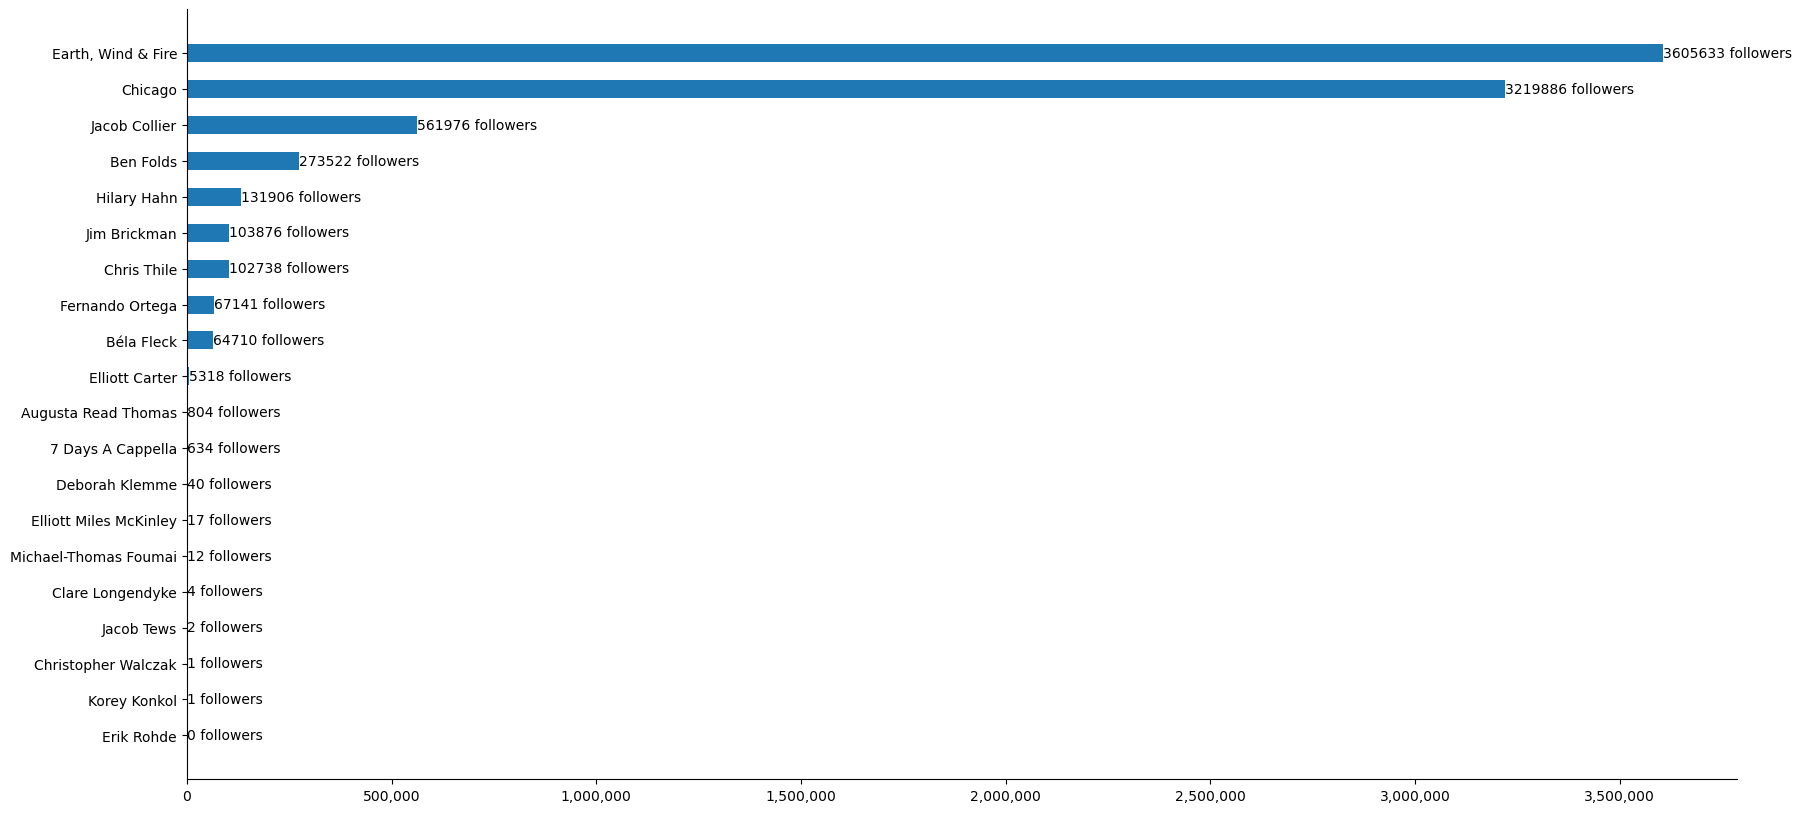

In [214]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
hbars = ax.barh(y=artist_df['artist_name'], width=artist_df['followers'], height=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.bar_label(hbars, fmt='%.0f followers')
# ax.set_xlim(right=15)
plt.show()